<a href="https://colab.research.google.com/github/deepakk177/ML---Lab-Programs-MTech-AI-2025-/blob/main/Machine_Learning_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Lab 5 : Clustering And Regression**
**Name :** Deepak Singh Porte

**Scholar Number :** 25215011122


**Question 1: K-Means Clustering**

**Part A**

Dataset: (1,2), (1,4), (1,0), (10,2), (10,4), (10,0)

Tasks:

* Apply K-Means clustering with k=2.

* Use initial centroids at (1,2) and (10,2).

* Assign each point to the nearest centroid and update centroids.

* Print final cluster assignments and centroids.

* Plot the points and centroids.

Dataset: [[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]]
K-Means Clustering with k=2

Initial centroids: [[1, 2], [10, 2]]

Iteration process:
Iteration 1:
  Centroids: [[1.0, 2.0], [10.0, 2.0]]
  Converged!

FINAL RESULTS:
Final centroids: [[1.0, 2.0], [10.0, 2.0]]

Cluster assignments:
  Point [1, 2]: Cluster 1
  Point [1, 4]: Cluster 1
  Point [1, 0]: Cluster 1
  Point [10, 2]: Cluster 2
  Point [10, 4]: Cluster 2
  Point [10, 0]: Cluster 2




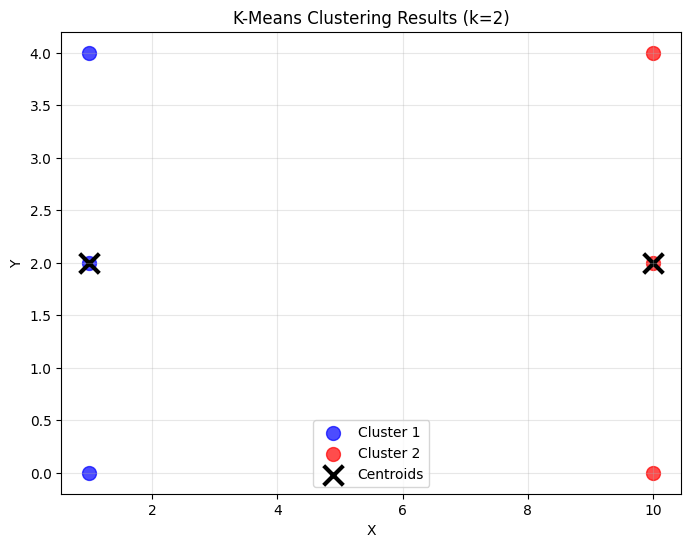

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def assign_clusters(points, centroids):
    assignments = []
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        assignments.append(np.argmin(distances))
    return np.array(assignments)

def update_centroids(points, assignments, k):
    new_centroids = []
    for cluster in range(k):
        cluster_points = points[assignments == cluster]
        if len(cluster_points) > 0:
            new_centroids.append(np.mean(cluster_points, axis=0))
        else:
            new_centroids.append(centroids[cluster])
    return np.array(new_centroids)

def kmeans(points, initial_centroids, k=2, max_iters=100):
    centroids = np.array(initial_centroids)

    print("Initial centroids:", centroids.tolist())
    print("\nIteration process:")

    for iteration in range(max_iters):
        old_centroids = centroids.copy()
        assignments = assign_clusters(points, centroids)
        centroids = update_centroids(points, assignments, k)

        print(f"Iteration {iteration + 1}:")
        print(f"  Centroids: {centroids.tolist()}")

        if np.allclose(old_centroids, centroids, rtol=1e-4):
            print("  Converged!")
            break

    return centroids, assignments

def plot_results(points, centroids, assignments):
    colors = ['blue', 'red']
    plt.figure(figsize=(8, 6))

    for cluster in range(2):
        cluster_points = points[assignments == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=colors[cluster], s=100, alpha=0.7,
                   label=f'Cluster {cluster + 1}')

    plt.scatter(centroids[:, 0], centroids[:, 1],
               c='black', s=200, marker='x', linewidth=3,
               label='Centroids')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Means Clustering Results (k=2)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Dataset
points = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
initial_centroids = [[1, 2], [10, 2]]

print("Dataset:", points.tolist())
print("K-Means Clustering with k=2\n")

# Run K-Means
final_centroids, final_assignments = kmeans(points, initial_centroids)

print("\nFINAL RESULTS:")
print("Final centroids:", final_centroids.tolist())
print("\nCluster assignments:")
for i, (point, cluster) in enumerate(zip(points, final_assignments)):
    print(f"  Point {point.tolist()}: Cluster {cluster + 1}")

# Plot results
print("\n")
plot_results(points, final_centroids, final_assignments)

.

**Part B**

* Import the Iris dataset from sklearn.datasets.
* Select features sepal length and petal length.
* Apply K-Means with k=3.
* Report cluster centroids and sizes.
* Visualize the clusters in 2D.

Dataset shape: (150, 2)
Features: ['Sepal Length', 'Petal Length']

Cluster Results:

Cluster 0:
  Centroid: (5.008, 1.492)
  Size: 51 samples
Cluster 1:
  Centroid: (6.839, 5.678)
  Size: 41 samples
Cluster 2:
  Centroid: (5.874, 4.393)
  Size: 58 samples


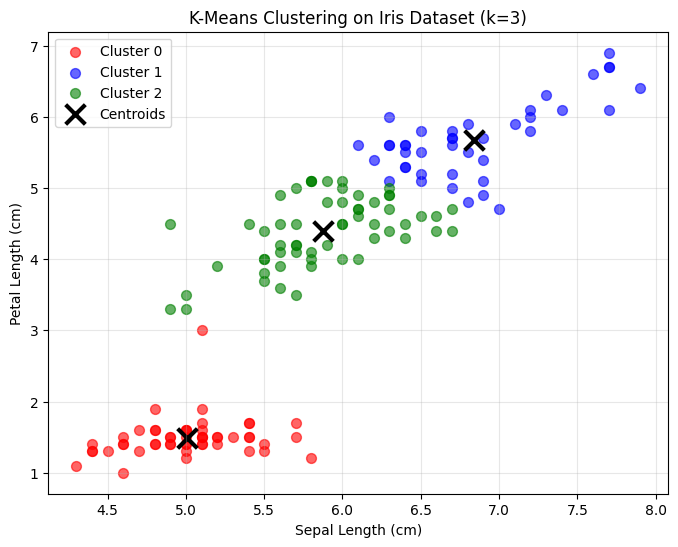

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal length and petal length
print("Dataset shape:", X.shape)
print("Features: ['Sepal Length', 'Petal Length']")

# K-Means implementation
k = 3
centroids = X[np.random.choice(len(X), k, replace=False)]  # Random initialization

for iteration in range(100):
    # Assign clusters
    labels = np.argmin([np.sum((X - c)**2, axis=1) for c in centroids], axis=0)

    # Update centroids
    old_centroids = centroids.copy()
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)

    # Check convergence
    if np.allclose(old_centroids, centroids):
        break

# Report results
print("\nCluster Results:\n")
for i in range(k):
    size = np.sum(labels == i)
    print(f"Cluster {i}:")
    print(f"  Centroid: ({centroids[i][0]:.3f}, {centroids[i][1]:.3f})")
    print(f"  Size: {size} samples")

# Visualize
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                c=colors[i], alpha=0.6, s=50, label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='black', marker='x', s=200, linewidth=3, label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-Means Clustering on Iris Dataset (k=3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Question 2: K-Medoids Clustering**

**Part A**

Dataset: [1, 2, 2, 3, 10, 11, 12]

Tasks:

* Run K-Medoids with k=2, using Manhattan distance.
* Start with initial medoids {2, 11}.
* Assign points to nearest medoid and compute total cost.
* Report final medoids and clusters.

Initial medoids: [2, 11] 

Iteration 1: Medoids: [2, 11], Cost: 4
Converged!

Final medoids: [2, 11], Cost: 4
Cluster 1: [1, 2, 2, 3]
Cluster 2: [10, 11, 12]


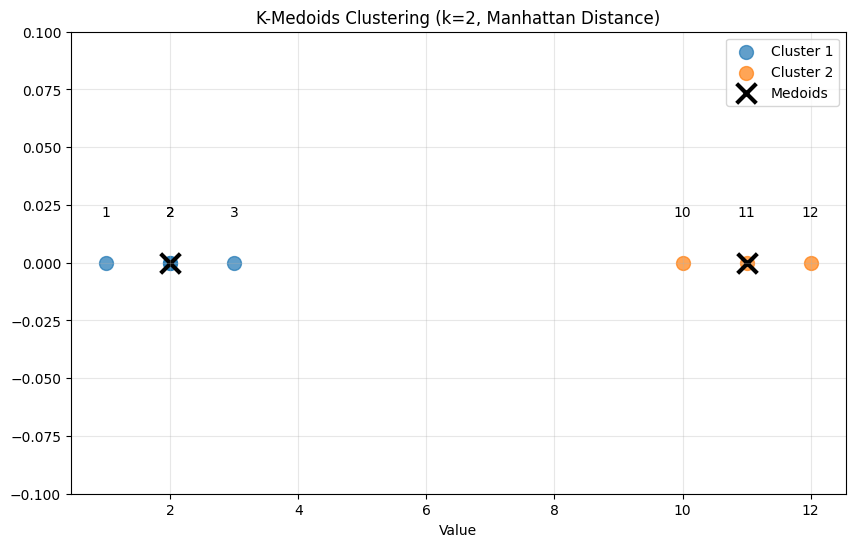

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def k_medoids(points, medoids, k=2, max_iters=100):
    points = np.array(points)

    print("Initial medoids:", medoids, "\n")

    for it in range(max_iters):
        # Assign clusters
        assignments = np.array([np.argmin([abs(p - m) for m in medoids]) for p in points])
        cost = sum(abs(points[i] - medoids[assignments[i]]) for i in range(len(points)))

        print(f"Iteration {it + 1}: Medoids: {medoids}, Cost: {cost}")

        # Update medoids
        new_medoids = []
        for c in range(k):
            cluster = points[assignments == c]
            if len(cluster) > 0:
                new_medoids.append(cluster[np.argmin([sum(abs(cluster - p)) for p in cluster])])
            else:
                new_medoids.append(medoids[c])

        if new_medoids == medoids:
            print("Converged!\n")
            break
        medoids = new_medoids

    return medoids, assignments, cost

# Dataset
points = [1, 2, 2, 3, 10, 11, 12]
medoids, assignments, cost = k_medoids(points, [2, 11])

print(f"Final medoids: {medoids}, Cost: {cost}")
for c in range(2):
    print(f"Cluster {c + 1}: {np.array(points)[assignments == c].tolist()}")

# Plot
points_arr = np.array(points)
plt.figure(figsize=(10, 6))
for c in range(2):
    plt.scatter(points_arr[assignments == c], [0] * sum(assignments == c), s=100, alpha=0.7, label=f'Cluster {c + 1}')
plt.scatter(medoids, [0, 0], c='black', s=200, marker='x', linewidth=3, label='Medoids')
for p in points:
    plt.annotate(str(p), (p, 0.02), ha='center')
plt.xlabel('Value')
plt.title('K-Medoids Clustering (k=2, Manhattan Distance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 0.1)
plt.show()

**Part B**

* Import the Iris dataset.
* Select features sepal length and petal length.
* Apply K-Medoids with k=3 using Manhattan distance.
* Report final medoids, total cost, and cluster assignments.
* Visualize the clusters.


Dataset shape: (150, 2)
Features: Sepal Length, Petal Length

Final medoids: [np.int64(7), np.int64(78), np.int64(140)]
Total cost: 95.60

Cluster assignments:
Cluster 0: Medoid at (5.000, 1.500), Size: 54
Cluster 1: Medoid at (6.000, 4.500), Size: 55
Cluster 2: Medoid at (6.700, 5.600), Size: 41


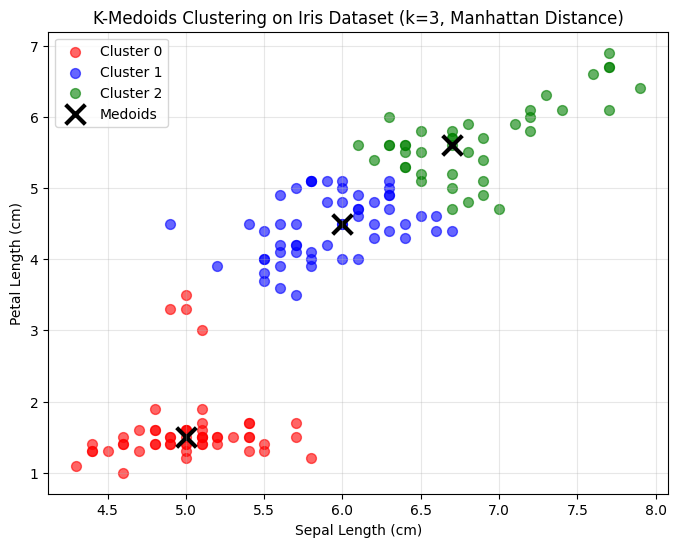

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def k_medoids(X, medoids, k=3, max_iters=100):
    for it in range(max_iters):
        # Assign to nearest medoid (Manhattan distance)
        assignments = np.array([np.argmin([np.sum(np.abs(x - X[m])) for m in medoids]) for x in X])
        cost = sum(np.sum(np.abs(X[i] - X[medoids[assignments[i]]])) for i in range(len(X)))

        # Update medoids
        new_medoids = []
        for c in range(k):
            cluster_idx = np.where(assignments == c)[0]
            if len(cluster_idx) > 0:
                costs = [sum(np.sum(np.abs(X[cluster_idx] - X[idx]), axis=1)) for idx in cluster_idx]
                new_medoids.append(cluster_idx[np.argmin(costs)])
            else:
                new_medoids.append(medoids[c])

        if new_medoids == medoids:
            break
        medoids = new_medoids

    assignments = np.array([np.argmin([np.sum(np.abs(x - X[m])) for m in medoids]) for x in X])
    cost = sum(np.sum(np.abs(X[i] - X[medoids[assignments[i]]])) for i in range(len(X)))
    return medoids, assignments, cost

# Load Iris dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal length and petal length

print("Dataset shape:", X.shape)
print("Features: Sepal Length, Petal Length\n")

# Apply K-Medoids with k=3
initial_medoids = [0, 50, 100]  # One from each species
medoids, labels, cost = k_medoids(X, initial_medoids, k=3)

# Report results
print("Final medoids:", medoids)
print("Total cost:", f"{cost:.2f}")
print("\nCluster assignments:")
for c in range(3):
    size = sum(labels == c)
    centroid = X[medoids[c]]
    print(f"Cluster {c}: Medoid at ({centroid[0]:.3f}, {centroid[1]:.3f}), Size: {size}")

# Visualize
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for c in range(3):
    plt.scatter(X[labels == c, 0], X[labels == c, 1], c=colors[c], alpha=0.6, s=50, label=f'Cluster {c}')
plt.scatter(X[medoids, 0], X[medoids, 1], c='black', marker='x', s=200, linewidth=3, label='Medoids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-Medoids Clustering on Iris Dataset (k=3, Manhattan Distance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()